# 📊 Statistics

## Exploratory Data Analysis (Descriptive Statistic)
* **summarizing**, **organizing**, and **simplifying**

In [39]:
import pandas as pd
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots 

In [40]:
# Create the data
data = {
    "State": ["Alabama", "Alaska", "Arizona", "Arkansas", "California", 
              "Colorado", "Connecticut", "Delaware"],
    "Population": [4779736, 710231, 6392017, 2915918, 37253956, 
                   5029196, 3574097, 897934],
    "Murder rate": [5.7, 5.6, 4.7, 5.6, 4.4, 2.8, 2.4, 5.8],
    "Abbreviation": ["AL", "AK", "AZ", "AR", "CA", "CO", "CT", "DE"]
}

# Create the DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
df

,State,Population,Murder rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


### Compute the mean, trimmed mean, and median for the population

In [41]:
# Mean
mean = df['Population'].mean()
print(mean)

7694135.625


In [42]:
# Trimmed mean
trimmed_mean = sts.trim_mean(df['Population'], proportiontocut=0.10)
print(trimmed_mean)

7694135.625


In [43]:
# Median
median = df['Population'].median()
print(median)

4176916.5


### Weighted Mean Applicable Case:
* When data points are not equally significant
* Groups have different sizes
* Items have different importance
* Dealing woth pre-grounded (aggregated) data

In [44]:
df

,State,Population,Murder rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA
5,Colorado,5029196,2.8,CO
6,Connecticut,3574097,2.4,CT
7,Delaware,897934,5.8,DE


In [45]:
# Basic Implementation

numerator = (df['Murder rate'] * df['Population']).sum()
denominator = df['Population'].sum()

weighted_mean = numerator / denominator
print(f'weighted_mean: {weighted_mean:.2f}')

weighted_mean: 4.38


In [46]:
# Using the np.average() method
weighted_mean = np.average(df['Murder rate'], weights = df['Population'])
print(f'weighted_mean: {weighted_mean:.2f}')

weighted_mean: 4.38


### Weighted Median
**Steps:**  
* Sort the data in ascending order
* Calculate cumulative weights $(S_i)$ for each data point
* Find the total weight $W_total$
* The weighted median is the first value $x_k$ where the cumulative weight $S_k >=$ to half the total weight

In [47]:
df_sorted = df.sort_values(by = 'Murder rate')
cumulative_weight = df_sorted['Population'].cumsum()

total_weight = df_sorted['Population'].sum()
half_of_total_weight = total_weight / 2

weighted_median = df_sorted[cumulative_weight >= half_of_total_weight].iloc[0]
print(f'Weighted Median: {weighted_median['Murder rate']}')
print(f'Simple Median: {df_sorted['Murder rate'].median()}')

Weighted Median: 4.4
Simple Median: 5.15


## Estimates of Variability
* **Variability (dispersion)**: measures whether the data values are tightly clustered or spread out

### Deviation
* The difference between the observed values and the estimate of location
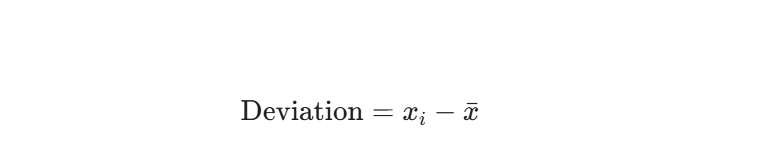

In [48]:
df1 = pd.DataFrame(data)
mean_value = df1['Murder rate'].mean()
df1['Deviation'] = df1['Murder rate'] - mean_value
df1

,State,Population,Murder rate,Abbreviation,Deviation
0,Alabama,4779736,5.7,AL,1.075
1,Alaska,710231,5.6,AK,0.975
2,Arizona,6392017,4.7,AZ,0.075
3,Arkansas,2915918,5.6,AR,0.975
4,California,37253956,4.4,CA,-0.225
5,Colorado,5029196,2.8,CO,-1.825
6,Connecticut,3574097,2.4,CT,-2.225
7,Delaware,897934,5.8,DE,1.175


In [49]:
# This "Zero Sum" is the problem! We can't just average these numbers to measure spread because the negatives cancel out the positives.
print(f"\nSum of Deviations: {df1['Deviation'].sum():.10f}")


Sum of Deviations: -0.0000000000


## Variance (Solving the "Zero Sum" problem)
* Sum of squared deviations from the mean divided by $n -1$
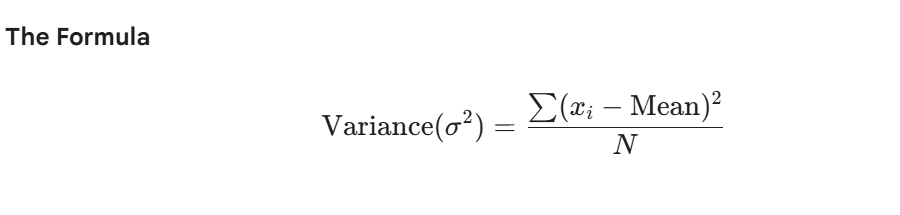
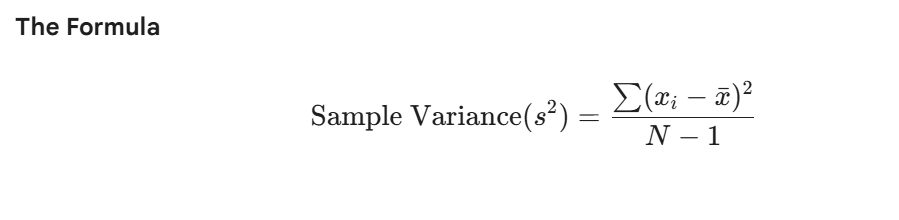

In [50]:
df1['Squared Deviation'] = df1['Deviation'] ** 2
print(f'The variance : {df1['Squared Deviation'].mean()}')

The variance : 1.5968749999999998


In [51]:
# Using .var() method
variance = df['Murder rate'].var(ddof = 1) # ddof = 1 means N - 1 --> Sample
print(f' Sample Variance: {variance:.2f}')
print()

variance = df['Murder rate'].var(ddof = 0) # ddof = 0 means N --> Population
print(f'Population Variance: {variance:.2f}')

 Sample Variance: 1.82

Population Variance: 1.60


## Standard Deviation
* The square root of the variance
  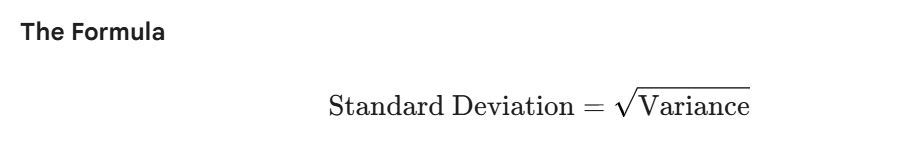

In [52]:
np.sqrt(df1['Squared Deviation'].mean())

np.float64(1.2636751956100112)

In [53]:
# Using Pnadas .std --> default to N - 1
sd = df['Murder rate'].std()
sd

1.3509256086106296

In [54]:
# Using NumPy np.std() method
population_sd = np.std(df1['Murder rate'], ddof = 0) # For population
sample_sd = np.std(df1['Murder rate'], ddof = 1) # For sample of the population
print(f'Population Standard Deviation: {population_sd}')
print(f'Sample Standard Deviation: {sample_sd}')

Population Standard Deviation: 1.2636751956100112
Sample Standard Deviation: 1.3509256086106296


## Mean Absolute Deviation
* mean of the absolute values of the deviations from the mean
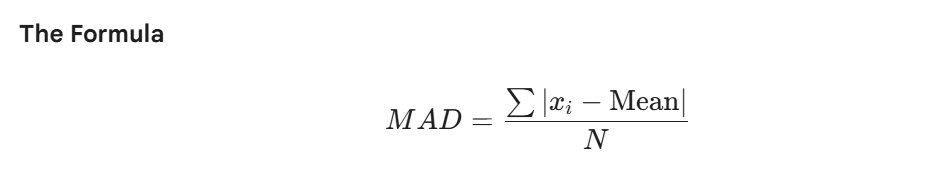

In [55]:
df1['Absolute Deviation'] = (df1['Murder rate'] - df1['Murder rate'].mean()).abs()
mean_absolute_deviation = df1['Absolute Deviation'].mean()
print(f'Mean Absolute Deviation: {mean_absolute_deviation:.2f}')

Mean Absolute Deviation: 1.07


## Median Absolute deviation (The Robust Estimate)
* the median of the absolute values of the deviations from the median
* it asks: "What is the median distance from the median?"
  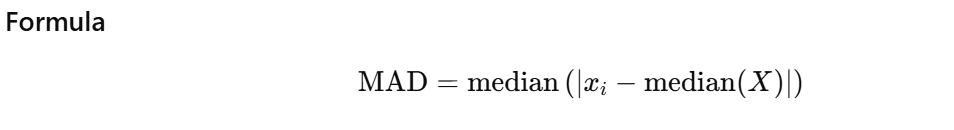

In [56]:
df1['Abs Deviation From Median'] = (df1['Murder rate'] - df1['Murder rate'].median()).abs()
median_absolute_deviation = df1['Abs Deviation From Median'].median()
print(f'Median of the data: {df1['Murder rate'].median()}')
print(f'Median Absolute Deviation: {median_absolute_deviation:.2f}')

Median of the data: 5.15
Median Absolute Deviation: 0.60


## Interquantile Range (IQR)
* difference between the $75th$ percentile and $25th$ percentile
  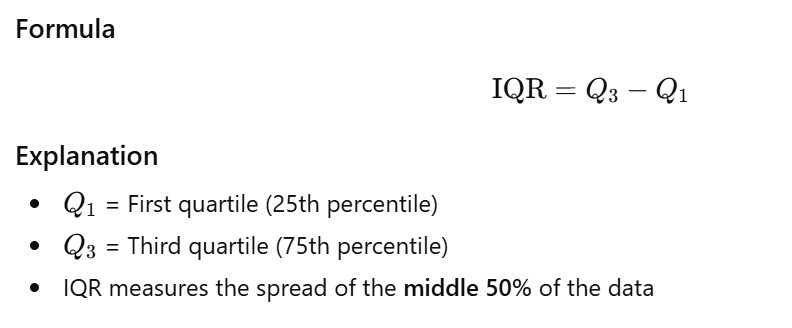

In [57]:
Q1 = df1['Murder rate'].quantile(0.25)
Q3 = df1['Murder rate'].quantile(0.75)

IQR = Q3 - Q1

# Upper limit and lower limit
lower_limit = Q1 - ( 1.5 * IQR)
upper_limit = Q3 + (1.5 * IQR)

print(f'Lower limit: {lower_limit}, Upper limit: {upper_limit}')
print(f'The Interquartile Range : {IQR}')

# Check for outliers
df1['Is Outlier(Murder rate)'] = (df1['Murder rate'] < lower_limit) | (df1['Murder rate'] > upper_limit)
df1

Lower limit: 1.5625, Upper limit: 8.0625
The Interquartile Range : 1.625


,State,Population,Murder rate,Abbreviation,Deviation,Squared Deviation,Absolute Deviation,Abs Deviation From Median,Is Outlier(Murder rate)
0,Alabama,4779736,5.7,AL,1.075,1.155625,1.075,0.55,False
1,Alaska,710231,5.6,AK,0.975,0.950625,0.975,0.45,False
2,Arizona,6392017,4.7,AZ,0.075,0.005625,0.075,0.45,False
3,Arkansas,2915918,5.6,AR,0.975,0.950625,0.975,0.45,False
4,California,37253956,4.4,CA,-0.225,0.050625,0.225,0.75,False
5,Colorado,5029196,2.8,CO,-1.825,3.330625,1.825,2.35,False
6,Connecticut,3574097,2.4,CT,-2.225,4.950625,2.225,2.75,False
7,Delaware,897934,5.8,DE,1.175,1.380625,1.175,0.65,False


## Standard Error
* describes how much an estimate, for example, the sample mean, would vary if we repearedly drew new samples from the same population

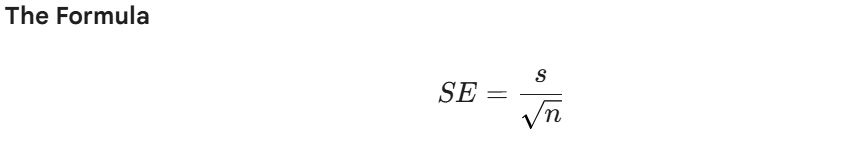

In [58]:
std = df1['Murder rate'].std()
n = len(df1)

SE = std / np.sqrt(n)
print(f'Standard Error: {SE:.2f}')
print(f'Standard Deviation: {df1['Murder rate'].std():.2f}')

Standard Error: 0.48
Standard Deviation: 1.35


### At a Glance

In [59]:
import pandas as pd
import numpy as np
from scipy import stats

# ==========================================
# 1. INPUT DATA
# ==========================================
data = {
    'State': ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 
              'California', 'Colorado', 'Connecticut', 'Delaware'],
    'Murder_Rate': [5.7, 5.6, 4.7, 5.6, 4.4, 2.8, 2.4, 5.8]
}
df = pd.DataFrame(data)
rates = df['Murder_Rate']

# ==========================================
# 2. CALCULATIONS
# ==========================================

# --- A. Measures of Location (Center) ---
mean_val = rates.mean()
median_val = rates.median()

# --- B. Measures of Variability (Spread) ---
# 1. Variance & SD (Sample: N-1)
var_sample = rates.var(ddof=1)
std_sample = rates.std(ddof=1)

# 2. MAD (Robust)
# Calculate Raw MAD manually (as per your image)
# Formula: median( | x - median | )
abs_deviations = (rates - median_val).abs()
mad_raw = abs_deviations.median()

# Calculate Scaled MAD (Standard Industry Practice)
# Multiplies Raw MAD by ~1.4826 to estimate Sigma
mad_scaled = stats.median_abs_deviation(rates, scale='normal')

# 3. IQR (Robust)
# Uses linear interpolation by default
Q1 = rates.quantile(0.25)
Q3 = rates.quantile(0.75)
IQR = Q3 - Q1

# --- C. Measure of Precision ---
# Standard Error: SD / sqrt(n)
n = len(rates)
std_error = std_sample / np.sqrt(n)

# --- D. Outlier Detection (IQR Method) ---
lower_fence = Q1 - (1.5 * IQR)
upper_fence = Q3 + (1.5 * IQR)
# Flag outliers
outliers = df[(rates < lower_fence) | (rates > upper_fence)]

# ==========================================
# 3. FINAL REPORT GENERATION
# ==========================================
print("--- STATISTICAL SUMMARY REPORT ---")
print(f"Count (N):              {n}")
print(f"Mean:                   {mean_val:.4f}")
print(f"Median:                 {median_val:.4f}")
print("-" * 30)
print("--- VARIABILITY ESTIMATES ---")
print(f"Sample Variance:        {var_sample:.4f}")
print(f"Sample Std Dev (SD):    {std_sample:.4f}  <-- Typical spread")
print(f"Standard Error (SE):    {std_error:.4f}  <-- Precision of the Mean")
print("-" * 30)
print("--- ROBUST ESTIMATES (Outlier Resistant) ---")
print(f"Raw MAD (Formula):      {mad_raw:.4f}  <-- ")
print(f"Scaled MAD:             {mad_scaled:.4f}  <-- Adjusted to match SD")
print(f"IQR (Middle 50%):       {IQR:.4f}")
print("-" * 30)
print("--- OUTLIER DETECTION ---")
print(f"Normal Range (Fences):  {lower_fence:.2f} to {upper_fence:.2f}")

if outliers.empty:
    print("Result:                 NO OUTLIERS DETECTED")
else:
    print(f"Result:                 {len(outliers)} OUTLIER(S) DETECTED")
    print(outliers)

--- STATISTICAL SUMMARY REPORT ---
Count (N):              8
Mean:                   4.6250
Median:                 5.1500
------------------------------
--- VARIABILITY ESTIMATES ---
Sample Variance:        1.8250
Sample Std Dev (SD):    1.3509  <-- Typical spread
Standard Error (SE):    0.4776  <-- Precision of the Mean
------------------------------
--- ROBUST ESTIMATES (Outlier Resistant) ---
Raw MAD (Formula):      0.6000  <-- 
Scaled MAD:             0.8896  <-- Adjusted to match SD
IQR (Middle 50%):       1.6250
------------------------------
--- OUTLIER DETECTION ---
Normal Range (Fences):  1.56 to 8.06
Result:                 NO OUTLIERS DETECTED


## $Xbar-R$ Chart
* control charts, used to monitor and control process by taking the performance of key variable over time
* give important information about stability
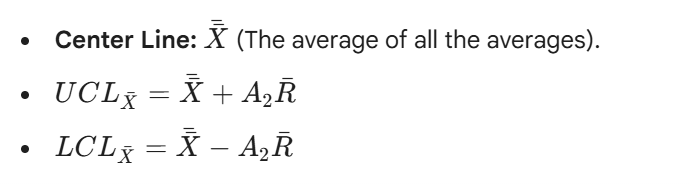

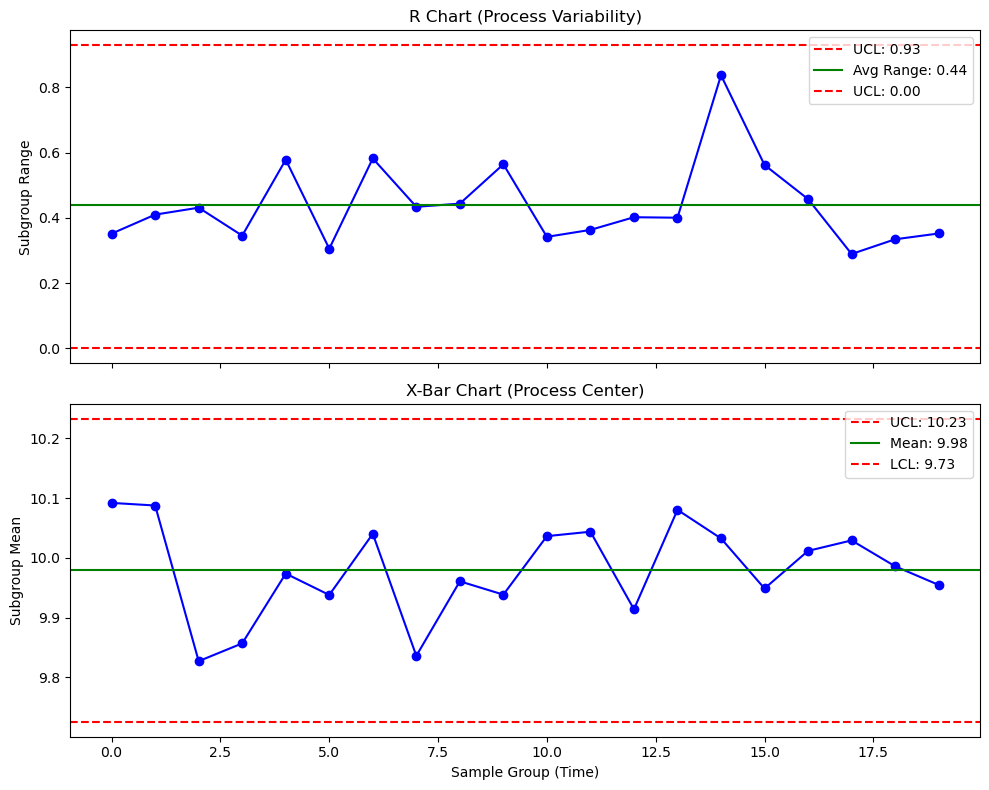

In [60]:
# 1. Generate Synthetic Process Data
# Scenario: Target diameter is 10.0mm. Standard Deviation is 0.2.
# We take 5 samples (n=5) for 20 time periods (k=20).
np.random.seed(42)
data = np.random.normal(loc=10.0, scale=0.2, size=(20, 5))

# Create a DataFrame where each row is a "subgroup" (e.g., Hour 1, Hour 2...)
df_process = pd.DataFrame(data, columns=['S1', 'S2', 'S3', 'S4', 'S5'])


# Calculate X-bar and R for each subgroup
df_process['Xbar'] = df_process.mean(axis = 1)
df_process['R'] = df_process.max(axis = 1) - df_process.min(axis = 1)

# Calculate overall process stats (Center Lines)
x_double_bar = df_process['Xbar'].mean()
r_bar = df_process['R'].mean()

# Calculate the control limits (Constants for n = 5)
A2 = 0.577
D4 = 2.114
D3 = 0 # For n < 7, LCL_R is effectively 0

ucl_x = x_double_bar + (A2 * r_bar)
lcl_x = x_double_bar - (A2 * r_bar)

# R limits
ucl_r = D4 * r_bar
lcl_r = D3 * r_bar

# Plotting 
fig, ax = plt.subplots(2,1, figsize = (10, 8), sharex = True)


# # --- Chart 1: R Chart (Variability) ---
ax[0].plot(df_process['R'], marker = 'o', linestyle = '-', color = 'blue')
ax[0].axhline(ucl_r, color = 'red', linestyle = '--', label = f'UCL: {ucl_r:.2f}')
ax[0].axhline(r_bar, color = 'green', label = f'Avg Range: {r_bar:.2f}')
ax[0].axhline(lcl_r, color = 'red', linestyle = '--', label = f'UCL: {lcl_r:.2f}')
ax[0].set_title(f'R Chart (Process Variability)')
ax[0].set_ylabel('Subgroup Range')
ax[0].legend()


# --- Chart 2: X-bar Chart (Mean) ---
ax[1].plot(df_process['Xbar'], marker = 'o', linestyle = '-', color = 'blue')
ax[1].axhline(ucl_x, color = 'red', linestyle = '--', label = f'UCL: {ucl_x:.2F}')
ax[1].axhline(x_double_bar, color = 'green', label = f'Mean: {x_double_bar:.2f}')
ax[1].axhline(lcl_x, color = 'red', linestyle = '--', label = f'LCL: {lcl_x:.2f}')
ax[1].set_title(f'X-Bar Chart (Process Center)')
ax[1].set_ylabel('Subgroup Mean')
ax[1].set_xlabel('Sample Group (Time)')
ax[1].legend()

plt.tight_layout()
plt.show()

Sample-wise X̄ and R:
   Sample_Xbar  Range
0         50.0    4.0
1         49.0    4.0
2         51.0    4.0
3         48.0    4.0
4         52.0    4.0
5         49.0    4.0
6         51.0    4.0
7         48.0    4.0
8         52.0    4.0
9         50.0    4.0

Overall Center Lines:
Grand Mean (X̄̄): 50.00
Average Range (R̄): 4.00

R Chart Limits: LCL = 0.00, CL = 4.00, UCL = 8.46
X̄ Chart Limits: LCL = 47.69, CL = 50.00, UCL = 52.31


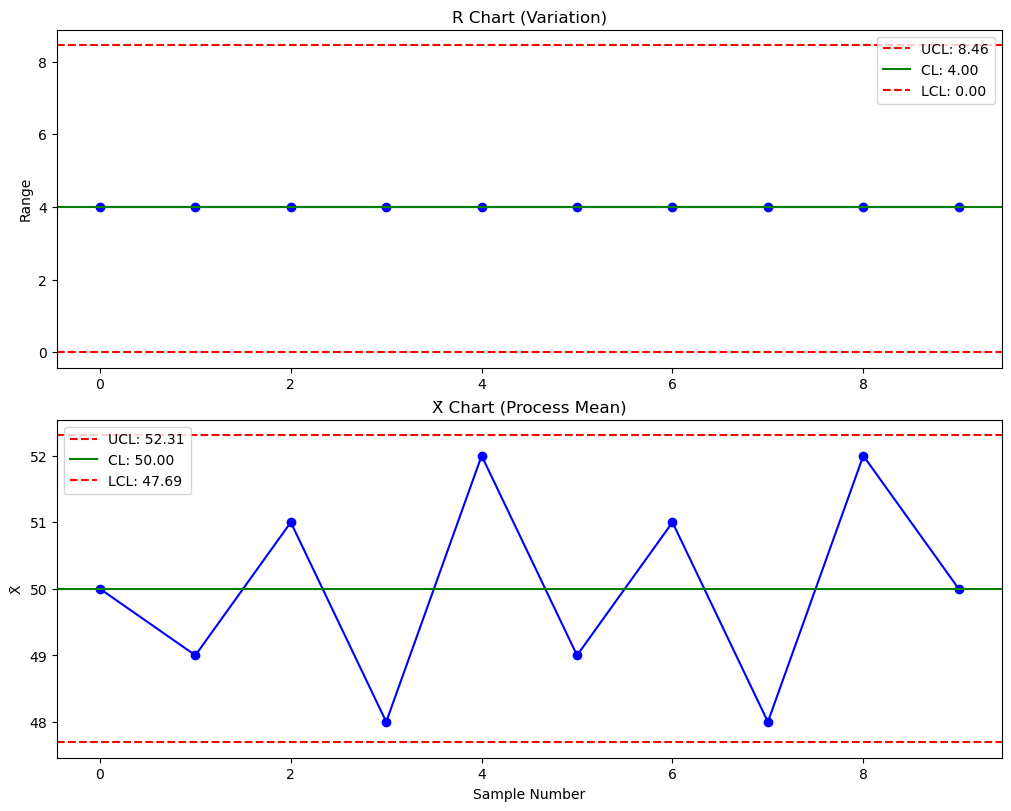

In [61]:
data = {
    "S1": [48, 47, 49, 46, 50, 48, 49, 47, 50, 48],
    "S2": [50, 49, 50, 48, 52, 49, 51, 48, 51, 49],
    "S3": [49, 50, 52, 47, 51, 47, 50, 49, 52, 50],
    "S4": [51, 48, 51, 49, 53, 50, 52, 50, 53, 51],
    "S5": [52, 51, 53, 50, 54, 51, 53, 46, 54, 52]
}
df = pd.DataFrame(data)



df['Sample_Xbar'] = df.mean(axis = 1)
df['Range'] = df.max(axis = 1) - df.min(axis = 1)


# Center lines for sample mean and ranges
Xbar_of_sample_xbar = df['Sample_Xbar'].mean()
R_bar = df['Range'].mean()

# Constant values
A2 = 0.577
D3 = 0
D4 = 2.114

# Control limit for ranges
ucl_r = D4 * R_bar
lcl_r = D3 * R_bar

# Control limits for sample mean
ucl_x = Xbar_of_sample_xbar + (A2 * R_bar)
lcl_x = Xbar_of_sample_xbar - (A2 * R_bar)

# Calculations
print("Sample-wise X̄ and R:")
print(df[['Sample_Xbar', 'Range']])
print("\nOverall Center Lines:")
print(f"Grand Mean (X̄̄): {Xbar_of_sample_xbar:.2f}")
print(f"Average Range (R̄): {R_bar:.2f}")
print("\nR Chart Limits: LCL = {0:.2f}, CL = {1:.2f}, UCL = {2:.2f}".format(lcl_r, R_bar, ucl_r))
print("X̄ Chart Limits: LCL = {0:.2f}, CL = {1:.2f}, UCL = {2:.2f}".format(lcl_x, Xbar_of_sample_xbar, ucl_x))

# Plot the graph
fig, ax = plt.subplots(2,1,figsize = (10, 8), layout = 'constrained')


# R Chart
ax[0].plot(df['Range'], marker='o', color='blue')
ax[0].axhline(ucl_r, color='red', linestyle='--', label=f'UCL: {ucl_r:.2f}')
ax[0].axhline(R_bar, color='green', label=f'CL: {R_bar:.2f}')
ax[0].axhline(lcl_r, color='red', linestyle='--', label=f'LCL: {lcl_r:.2f}')
ax[0].set_title('R Chart (Variation)')
ax[0].set_ylabel('Range')
ax[0].legend()

# X̄ Chart
ax[1].plot(df['Sample_Xbar'], marker='o', color='blue')
ax[1].axhline(ucl_x, color='red', linestyle='--', label=f'UCL: {ucl_x:.2f}')
ax[1].axhline(Xbar_of_sample_xbar, color='green', label=f'CL: {Xbar_of_sample_xbar:.2f}')
ax[1].axhline(lcl_x, color='red', linestyle='--', label=f'LCL: {lcl_x:.2f}')
ax[1].set_title('X̄ Chart (Process Mean)')
ax[1].set_ylabel('X̄')
ax[1].set_xlabel('Sample Number')
ax[1].legend()

plt.show()



## Control Charts
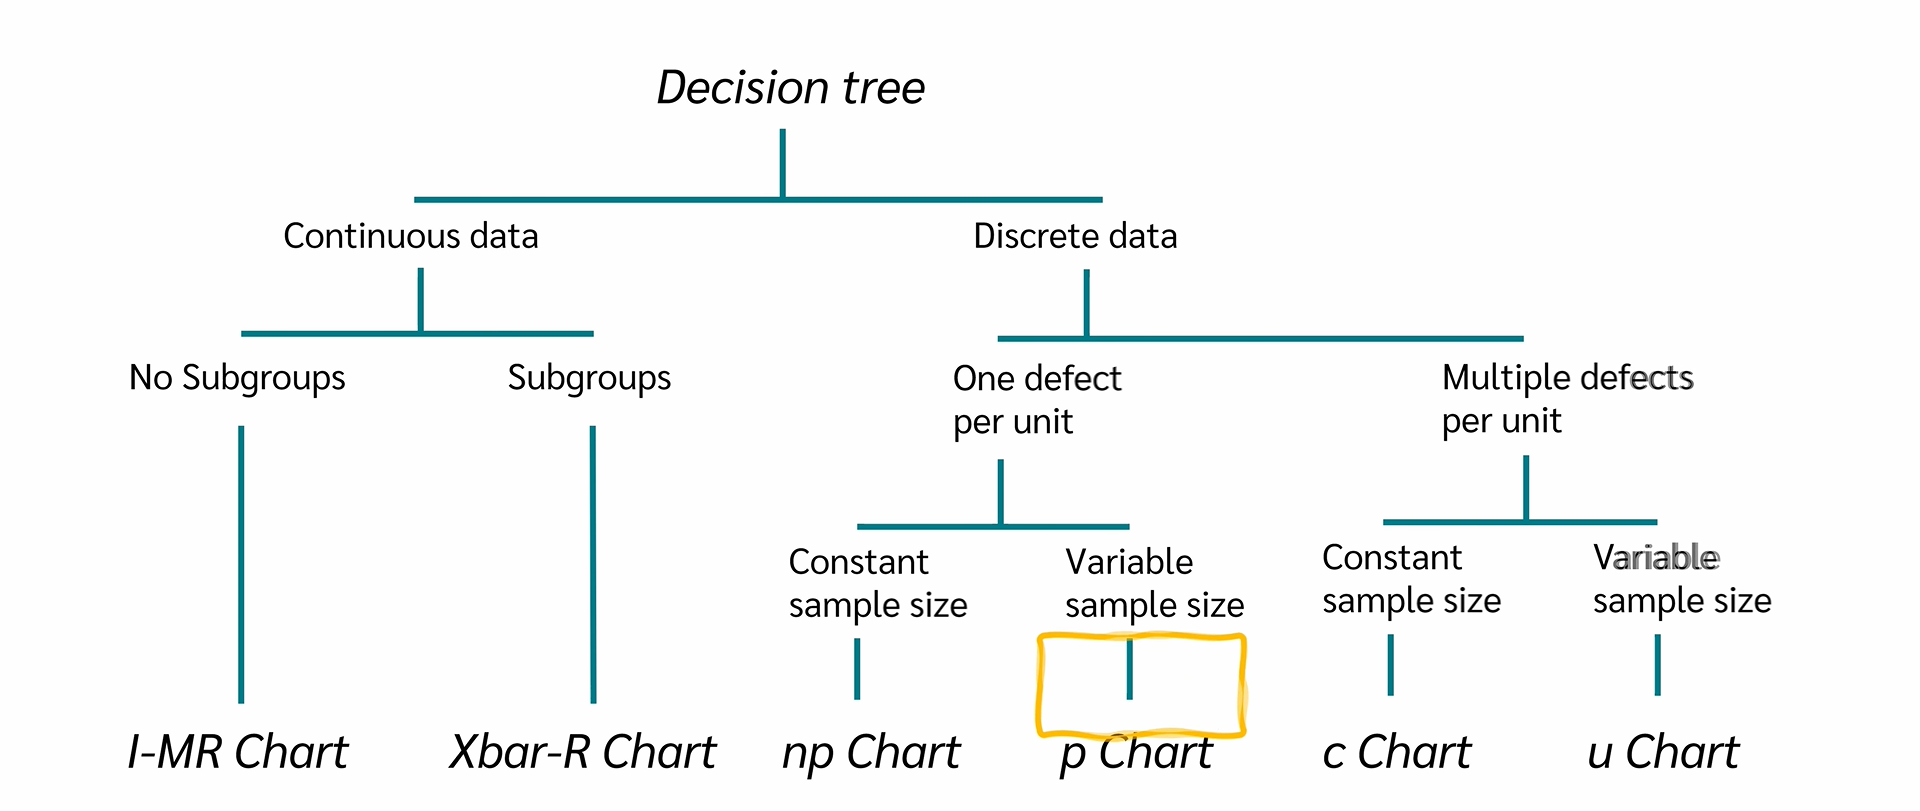

### The $X-bar R$ Chart

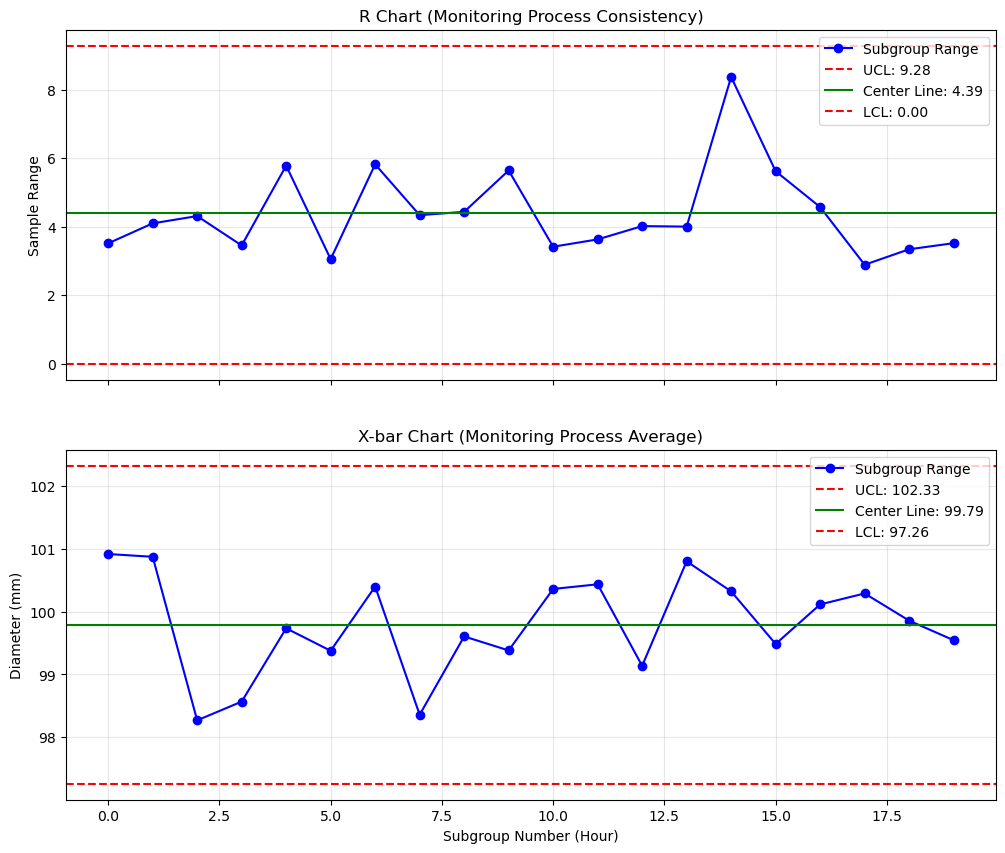

In [62]:
# Genearte Random Data
np.random.seed(42)

# simultaing 20 hours of data
# Each hour, we measure 5 rods (subgroup size n =5)
# Target diameter is 100mm, with some natural variation

data = np.random.normal(loc = 100, scale = 2, size = (20, 5))

# Create a Datarame where each row is one hour's subgroup
df = pd.DataFrame(data, columns = ['M1','M2','M3','M4','M5'])

# Calculate Statistics
# Calculate X-bar (Mean of each subgroup/row)
df['X_bar'] = df.mean(axis = 1)

# Calculate Range (Max - Min of each subgroup/row)
df['R'] = df.max(axis = 1) - df.min(axis = 1)

# Calculate Grand averages (Center Lines)
x_bar_bar = df['X_bar'].mean() # The average of the averages (Center of X-bar chart)
r_bar = df['R'].mean() # The average range (Center of R chart)

# Calculate the control limits
# Using standard constant
A2 = 0.577
D4 = 2.114
D3 = 0  # For n < 7, the lower limit for range is typically 0

# X-bar chart limits
ucl_x = x_bar_bar + (A2 * r_bar)
lcl_x = x_bar_bar - (A2 * r_bar)

# R chart limits
ucl_r = D4 * r_bar
lcl_r = D3 * r_bar

# Visualizing the charts
fig, ax = plt.subplots(2,1, figsize = (12, 10), sharex = True)

# Plot 1: R chart
ax[0].plot(df['R'], marker = 'o', color = 'b', label = 'Subgroup Range')
ax[0].axhline(ucl_r, color = 'r', linestyle = '--', label = f'UCL: {ucl_r:.2f}')
ax[0].axhline(r_bar, color = 'g', label = f'Center Line: {r_bar:.2f}')
ax[0].axhline(lcl_r, color = 'r', linestyle = '--', label = f'LCL: {lcl_r:.2f}')
ax[0].set_title('R Chart (Monitoring Process Consistency)')
ax[0].set_ylabel('Sample Range')
ax[0].grid(True, alpha = 0.3)
ax[0].legend()

# Plot 2: X-bar Chart
ax[1].plot(df['X_bar'], marker = 'o', color = 'b', label = 'Subgroup Range')
ax[1].axhline(ucl_x, color = 'r', linestyle = '--', label = f'UCL: {ucl_x:.2f}')
ax[1].axhline(x_bar_bar, color = 'g', label = f'Center Line: {x_bar_bar:.2f}')
ax[1].axhline(lcl_x, color = 'r', linestyle = '--', label = f'LCL: {lcl_x:.2f}')
ax[1].set_title('X-bar Chart (Monitoring Process Average)')
ax[1].set_xlabel('Subgroup Number (Hour)')
ax[1].set_ylabel('Diameter (mm)')
ax[1].grid(True, alpha = 0.3)
ax[1].legend()

plt.show()

#### Visualizing Using Plotly

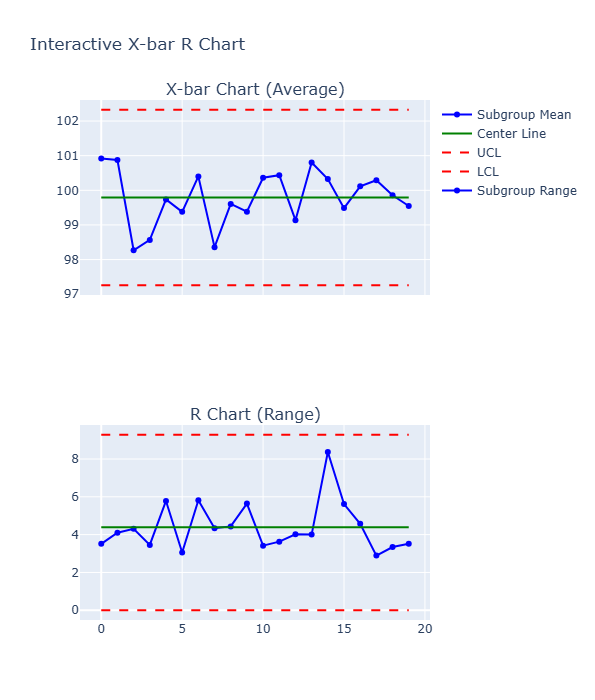

In [63]:
# --- Step 4: Plotting with Plotly ---
# Create a subplot with 2 rows
fig = make_subplots(rows=2, cols=1, 
                    shared_xaxes=True, 
                    subplot_titles=("X-bar Chart (Average)", "R Chart (Range)"))

# === Top Chart: X-bar ===
# Data Line
fig.add_trace(go.Scatter(y=df['X_bar'], mode='lines+markers', name='Subgroup Mean', line=dict(color='blue')), row=1, col=1)
# Center Line
fig.add_trace(go.Scatter(y=[x_bar_bar]*len(df), mode='lines', name='Center Line', line=dict(color='green')), row=1, col=1)
# UCL
fig.add_trace(go.Scatter(y=[ucl_x]*len(df), mode='lines', name='UCL', line=dict(color='red', dash='dash')), row=1, col=1)
# LCL
fig.add_trace(go.Scatter(y=[lcl_x]*len(df), mode='lines', name='LCL', line=dict(color='red', dash='dash')), row=1, col=1)

# === Bottom Chart: Range ===
# Data Line
fig.add_trace(go.Scatter(y=df['R'], mode='lines+markers', name='Subgroup Range', line=dict(color='blue')), row=2, col=1)
# Center Line
fig.add_trace(go.Scatter(y=[r_bar]*len(df), mode='lines', name='Center Line', line=dict(color='green'), showlegend=False), row=2, col=1)
# UCL
fig.add_trace(go.Scatter(y=[ucl_r]*len(df), mode='lines', name='UCL', line=dict(color='red', dash='dash'), showlegend=False), row=2, col=1)
# LCL
fig.add_trace(go.Scatter(y=[lcl_r]*len(df), mode='lines', name='LCL', line=dict(color='red', dash='dash'), showlegend=False), row=2, col=1)

# Update Layout
fig.update_layout(height=700, title_text="Interactive X-bar R Chart")
fig.show()

## The $I-MR$ Chart (Individual - Moving Range)
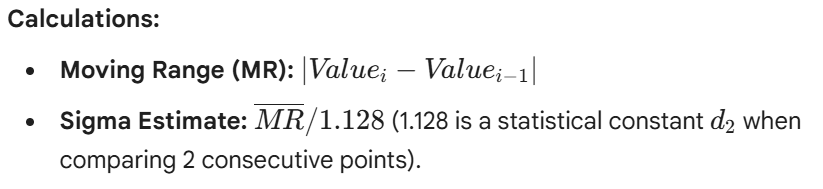

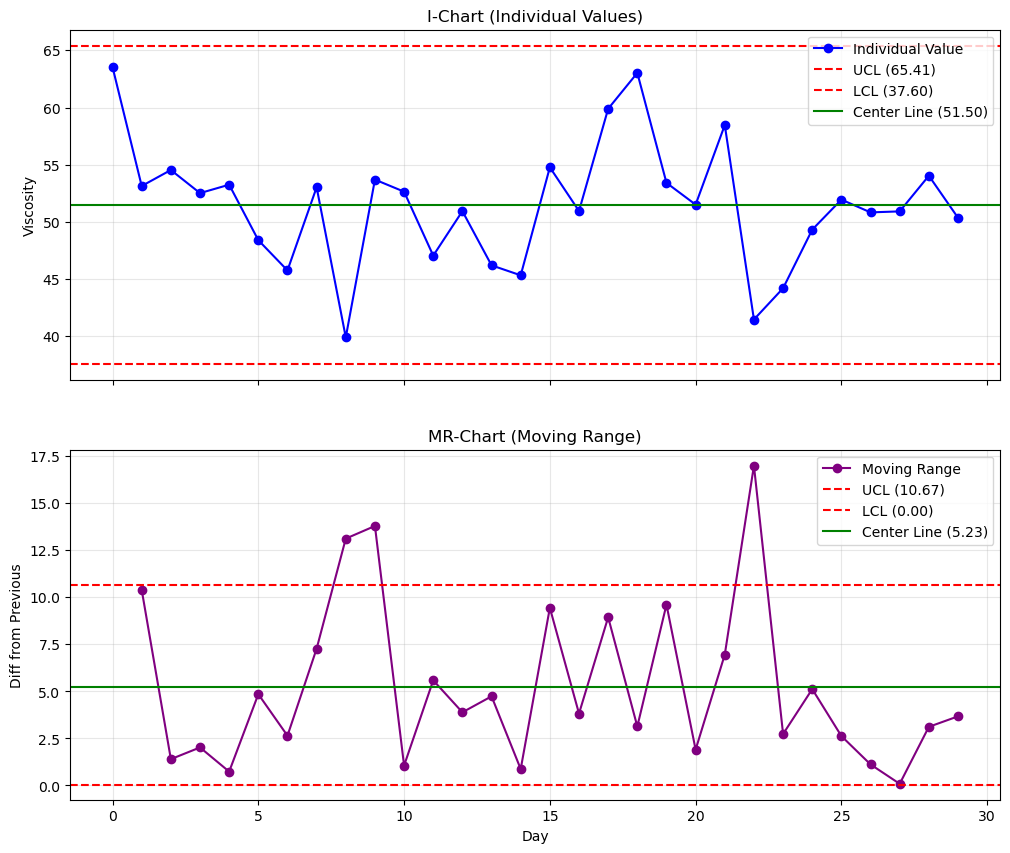

In [64]:
# Generate Data
np.random.seed(101)

# Simulating 30 days of single observations (viscosity readings)
# Mean = 50, Std Dev = 5
data = np.random.normal(loc = 50, scale = 5, size = 30)
df = pd.DataFrame(data, columns = ['Viscosity'])

# Calculate Moving Range (Absolute difference between consecutive rows)
df['MR'] = df['Viscosity'].diff().abs()

# Calculate Center Lines
mean_viscosity = df['Viscosity'].mean()  # Center Line for I-Chart
mean_mr = df['MR'].mean()  # Center Line for MR-Chart

# Calculate Control Limits
# Standard deviation estimation using MR
sigma_est = mean_mr / 1.128

# I-Chart Limits
ucl_i = mean_viscosity + (3 * sigma_est)
lcl_i = mean_viscosity - (3 * sigma_est)

# MR-ChartLimits (Constants for n = 2)
D4 = 3.267
D3 = 0

ucl_mr = 3.267 * D4
lcl_mr = 3.267 * D3

fig, axs = plt.subplots(2,1, figsize = (12, 10), sharex = True)


# Plot 1: I-Chart (Individual Values)
axs[0].plot(df['Viscosity'], marker='o', color='blue', label='Individual Value')
axs[0].axhline(ucl_i, color='red', linestyle='--', label=f'UCL ({ucl_i:.2f})')
axs[0].axhline(lcl_i, color='red', linestyle='--', label=f'LCL ({lcl_i:.2f})')
axs[0].axhline(mean_viscosity, color='green', label=f'Center Line ({mean_viscosity:.2f})')
axs[0].set_title('I-Chart (Individual Values)')
axs[0].set_ylabel('Viscosity')
axs[0].legend(loc='upper right')
axs[0].grid(True, alpha=0.3)

# Plot 2: MR-Chart (Moving Range)
# Note: The first MR value is always NaN because there is no previous value
axs[1].plot(df['MR'], marker='o', color='purple', label='Moving Range')
axs[1].axhline(ucl_mr, color='red', linestyle='--', label=f'UCL ({ucl_mr:.2f})')
axs[1].axhline(lcl_mr, color='red', linestyle='--', label='LCL (0.00)')
axs[1].axhline(mean_mr, color='green', label=f'Center Line ({mean_mr:.2f})')
axs[1].set_title('MR-Chart (Moving Range)')
axs[1].set_ylabel('Diff from Previous')
axs[1].set_xlabel('Day')
axs[1].legend(loc='upper right')
axs[1].grid(True, alpha=0.3)

plt.show()

## The $P-Chart$ (Attribute Data)
* A p‑chart watches the percentage of defective items over time and tells you whether what you see is just random noise or a real change in the process. It does this by putting a center line (average defect rate) and “expected‑by‑chance” limits around it; points outside (or certain patterns inside) suggest the process has shifted and needs investigation.
* p‑chart is designed for proportions (fractions defective) and works naturally when the sample size can change from period to period.
* 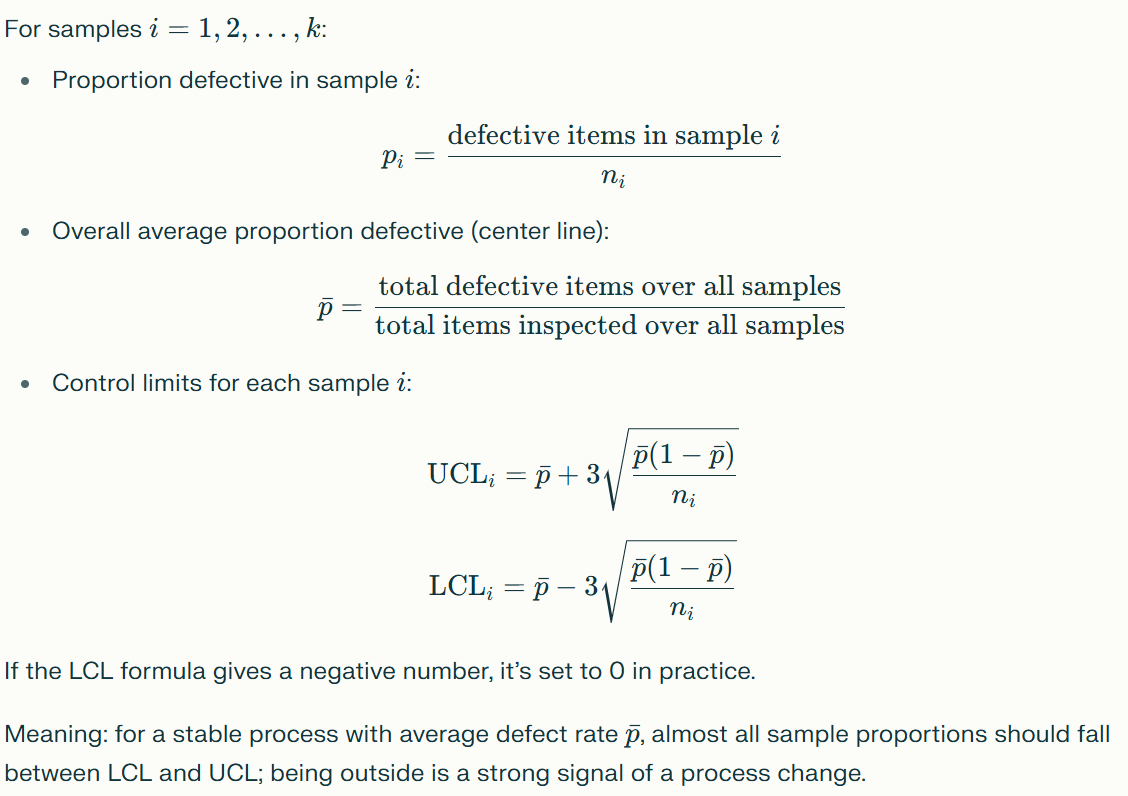



In [65]:
# Generate Data 
np.random.seed(42)

# 20 Days of Data
# Sample Size varies randomly between 100 amnd 300 invoices per day
sample_sizes = np.random.randint(100, 300, size = 20)

# Simulate defects (Assume average error rate is approx 5%)
# We use binomial distribution to get realistic integer counts of defects
defects = np.random.binomial(n = sample_sizes, p = 0.05)

df = pd.DataFrame({'Sample_Size': sample_sizes, 'Defects': defects})
df

,Sample_Size,Defects
0,202,12
1,279,20
2,192,2
3,114,12
4,206,11
5,171,9
6,288,6
7,120,2
8,202,10
9,221,10


In [66]:
# Calculate the daily proportion (p)
df['P'] = df['Defects'] / df['Sample_Size']
df

,Sample_Size,Defects,P
0,202,12,0.059406
1,279,20,0.071685
2,192,2,0.010417
3,114,12,0.105263
4,206,11,0.053398
5,171,9,0.052632
6,288,6,0.020833
7,120,2,0.016667
8,202,10,0.049505
9,221,10,0.045249


In [67]:
# Calculate the center line
p_bar = df['Defects'].sum() / df['Sample_Size'].sum()

# Calculate Variable Control Limits
# The limit changes for every single row because 'Sample Size' changes
df['Sigma'] = np.sqrt((p_bar * (1 - p_bar)) / df['Sample_Size'])

df['UCL'] = p_bar + (3 * df['Sigma'])
df['LCL'] = p_bar - (3 * df['Sigma'])

# Coorection: LCL cannot be negative (you cannot have -5% errors)
df['LCL'] = df['LCL'].clip(lower = 0)
df

,Sample_Size,Defects,P,Sigma,UCL,LCL
0,202,12,0.059406,0.015303,0.095695,0.003875
1,279,20,0.071685,0.013021,0.088849,0.010721
2,192,2,0.010417,0.015697,0.096876,0.002695
3,114,12,0.105263,0.020371,0.110898,0.000000
4,206,11,0.053398,0.015154,0.095247,0.004323
5,171,9,0.052632,0.016633,0.099683,0.000000
6,288,6,0.020833,0.012816,0.088234,0.011336
7,120,2,0.016667,0.019855,0.109350,0.000000
8,202,10,0.049505,0.015303,0.095695,0.003875
9,221,10,0.045249,0.014631,0.093677,0.005893


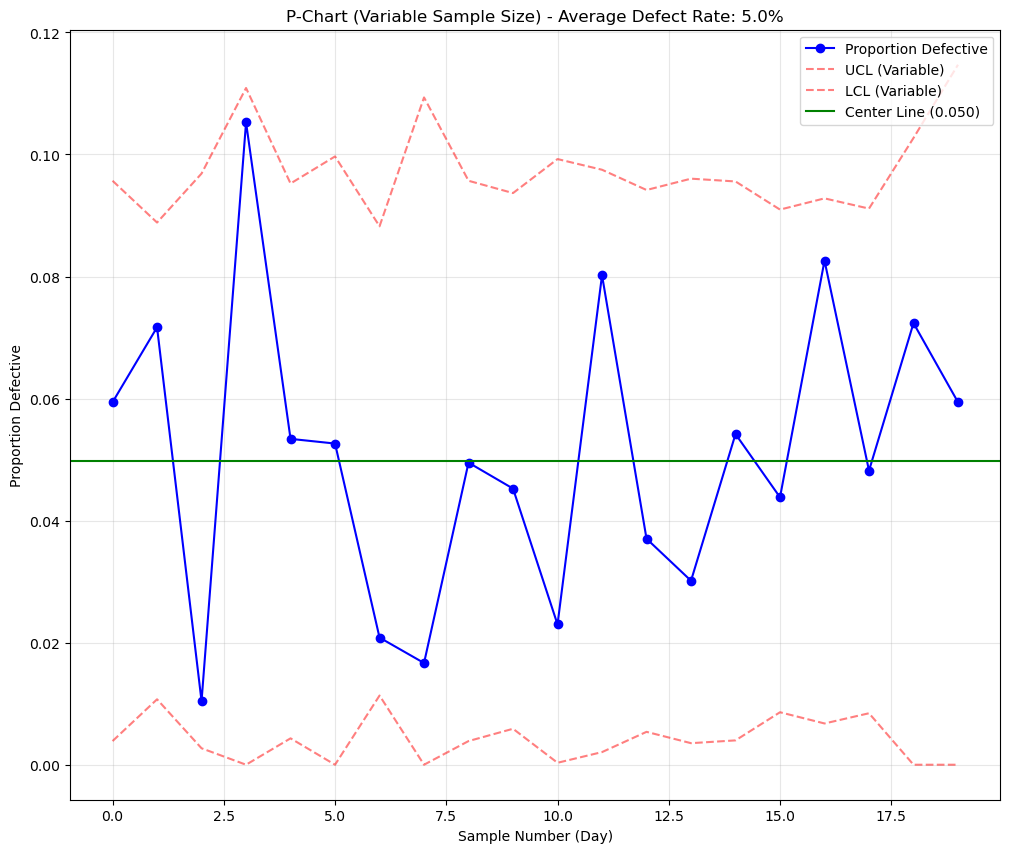

In [68]:
# Visualization
fig, ax = plt.subplots(figsize = (12, 10))

# Plot the proportion 
ax.plot(df['P'], marker = 'o', color = 'b', label = 'Proportion Defective')

# Plot the varibale limits
ax.plot(df['UCL'], color = 'r', linestyle = '--', alpha = 0.5, label = 'UCL (Variable)')
ax.plot(df['LCL'], color = 'r', linestyle = '--', alpha = 0.5, label = 'LCL (Variable)')

# Plot the center line
ax.axhline(p_bar, color = 'g', label = f'Center Line ({p_bar:.3f})')
ax.set_title(f'P-Chart (Variable Sample Size) - Average Defect Rate: {p_bar:.1%}')
ax.set_ylabel('Proportion Defective')
ax.set_xlabel('Sample Number (Day)')
ax.legend(loc='upper right')
ax.grid(True, alpha=0.3)

plt.show()

### The Western Electric Rules (or Nelson Rules)
📝Western Electric Rules are a small set of “alarm patterns” used on control charts to decide when a process is probably out of control.  

* Rule 1: One point beyond the 3σ control limit (above UCL or below LCL) → strong signal of special cause
* Rule 2: Two out of three consecutive points beyond 2σ from the centerline on the same side → likely mean shift
* Rule 3: Four out of five consecutive points beyond 1σ from the centerline on the same side → weaker but still important shift signal.
* Rule 4: Eight (sometimes seven or nine) consecutive points on the same side of the centerline → sustained shift even if all points are within limits.

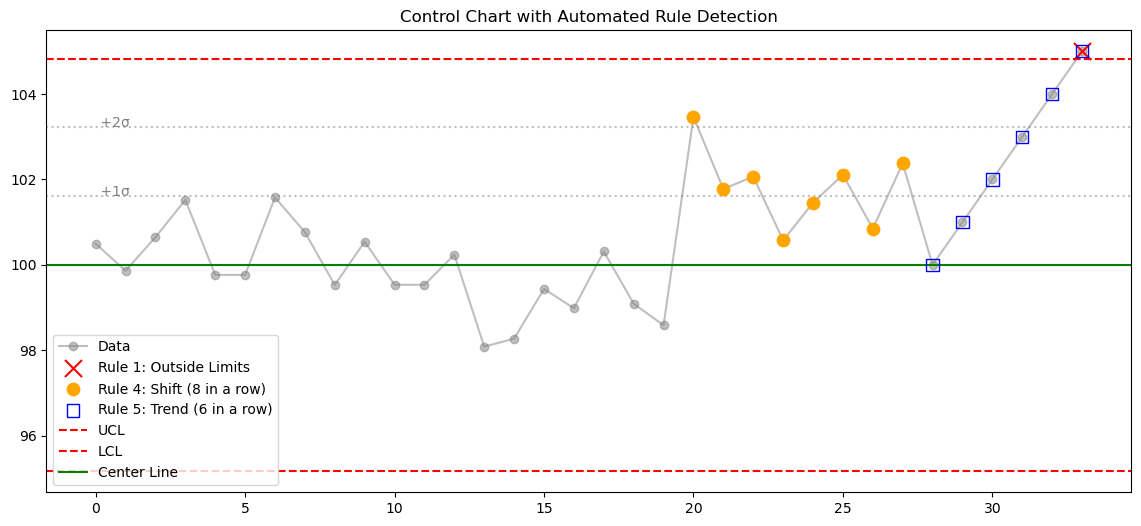

In [69]:
# --- Step 1: Generate Data with Intentional Errors ---
np.random.seed(42)
# Normal data (Mean=100)
data_normal = np.random.normal(loc=100, scale=1, size=20)
# A "Shift" (8 points shifted up to Mean=102)
data_shift = np.random.normal(loc=102, scale=1, size=8)
# A "Trend" (6 points steadily increasing)
data_trend = np.linspace(100, 105, 6)
# Combine them
full_data = np.concatenate([data_normal, data_shift, data_trend])

df = pd.DataFrame({'Value': full_data})

# --- Step 2: Calculate Limits & Zones ---
mean = 100 # Target Mean
# We estimate sigma based on the standard deviation of the data for this example
sigma = df['Value'].std()

# Define Zones
ucl = mean + 3*sigma
lcl = mean - 3*sigma
# Zone boundaries
zone_a_upper = mean + 2*sigma
zone_b_upper = mean + 1*sigma
zone_b_lower = mean - 1*sigma
zone_a_lower = mean - 2*sigma

# --- Step 3: Implement Rules Logic ---

def check_rules(data, mean, sigma):
    violations = {'Rule1': [], 'Rule4': [], 'Rule5': []}
    
    # Rule 1: One point beyond 3 sigma (UCL/LCL)
    violations['Rule1'] = data[ (data > mean + 3*sigma) | (data < mean - 3*sigma) ].index.tolist()
    
    # Rule 4: 8 consecutive points on same side of center
    # We convert data to +1 (above) and -1 (below)
    signs = np.sign(data - mean)
    for i in range(len(data) - 8):
        window = signs[i:i+8]
        if np.abs(window.sum()) == 8: # If sum is +8 or -8, they are all same side
            # Mark the whole sequence
            violations['Rule4'].extend(range(i, i+8))
            
    # Rule 5: 6 consecutive points increasing or decreasing
    # Calculate differences between consecutive points
    diffs = np.sign(np.diff(data))
    for i in range(len(diffs) - 5 + 1):
        window = diffs[i:i+5] # We need 5 diffs to represent 6 points
        if np.abs(window.sum()) == 5:
            violations['Rule5'].extend(range(i, i+6))
            
    return violations

v = check_rules(df['Value'], mean, sigma)

# --- Step 4: Visualizing ---
plt.figure(figsize=(14, 6))

# Plot the main data
plt.plot(df['Value'], marker='o', color='gray', linestyle='-', alpha=0.5, label='Data')

# Plot Violations
# Rule 1 (Red X)
plt.scatter(v['Rule1'], df.loc[v['Rule1']], color='red', s=150, marker='x', label='Rule 1: Outside Limits', zorder=5)
# Rule 4 (Orange Dot)
plt.scatter(list(set(v['Rule4'])), df.loc[list(set(v['Rule4']))], color='orange', s=80, label='Rule 4: Shift (8 in a row)', zorder=4)
# Rule 5 (Blue Square)
plt.scatter(list(set(v['Rule5'])), df.loc[list(set(v['Rule5']))], color='blue', marker='s', s=80, facecolors='none', label='Rule 5: Trend (6 in a row)', zorder=6)

# Plot Zones
plt.axhline(ucl, color='red', linestyle='--', label='UCL')
plt.axhline(lcl, color='red', linestyle='--', label='LCL')
plt.axhline(mean, color='green', label='Center Line')

# Visualize Sigma Zones for context
plt.axhline(zone_a_upper, color='gray', linestyle=':', alpha=0.5)
plt.axhline(zone_b_upper, color='gray', linestyle=':', alpha=0.5)
plt.text(0, zone_a_upper, ' +2σ', color='gray')
plt.text(0, zone_b_upper, ' +1σ', color='gray')

plt.title('Control Chart with Automated Rule Detection')
plt.legend(loc='lower left')
plt.show()

## The $NP-Chart$ (Number Defective)
* For an np‑chart you’re still in the “defectives” world, but now you chart the **number of defectives** per sample, not the proportion.
* Use an np‑chart when
    - each item is pass/fail (attribute data), and
    - the **sample size is constant** (same n every time)
    - The plotted value each time is $np_i =$ “count of defectives in sample i”.
    - 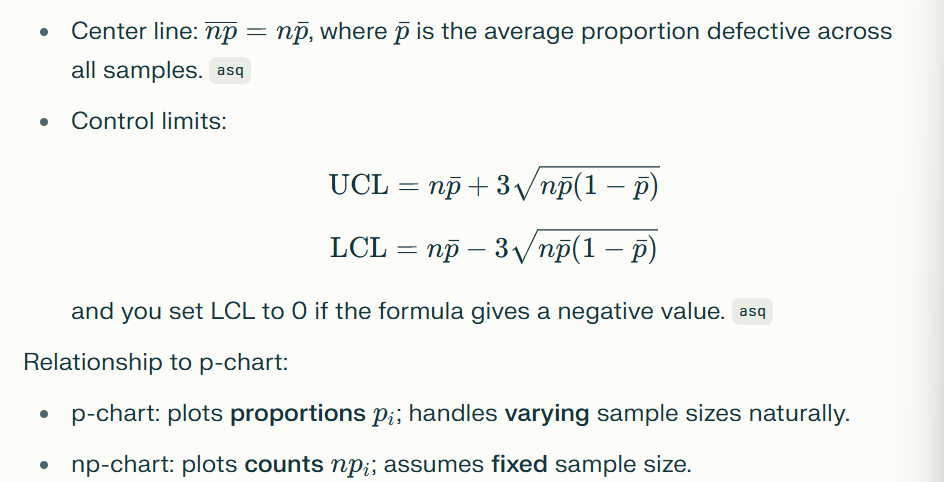
   



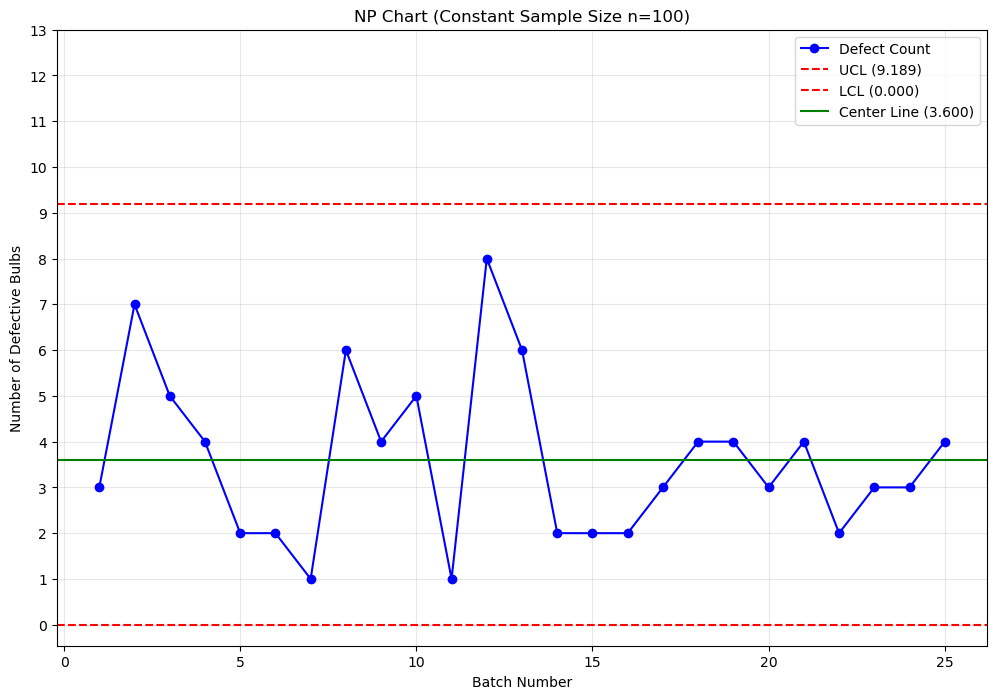

In [70]:
# --- Step 1: Generate Data ---
np.random.seed(42)

# Constant Sample Size (CRITICAL for NP Chart)
n = 100 

# Simulating 25 batches
# Let's say the average defect rate is 4% (0.04)
# We use Binomial to simulate the count of defects in each batch
defects = np.random.binomial(n=n, p=0.04, size=25)

df = pd.DataFrame({'Batch': range(1, 26), 'Defects': defects})

# Claculate Average Defect Rate (p_bar)
p_bar = df['Defects'].sum() / (n * len(df))

# Calculate the center line
# This simply the average count of defects
cl_np = n * p_bar

# Calculate the control limits
sigma_np = np.sqrt(n * p_bar * (1 - p_bar))

ucl_np = cl_np + (3 * sigma_np)
lcl_np = cl_np - (3 * sigma_np)

# Clamp LCL at 0 (cannot have negative defects)
lcl_np = max(0, lcl_np)

# Visualizing
fig, ax = plt.subplots(figsize = (12, 8))

# Plot the count
ax.plot(df['Batch'], df['Defects'], marker = 'o', color = 'b', label = 'Defect Count')

# Plot limits
ax.axhline(ucl_np, color = 'r', linestyle = '--', label = f'UCL ({ucl_np:.3f})')
ax.axhline(lcl_np, color = 'r', linestyle = '--', label = f'LCL ({lcl_np:.3f})')

# Plot the center line
ax.axhline(cl_np, color = 'g', label = f'Center Line ({cl_np:.3f})')

ax.set_title(f'NP Chart (Constant Sample Size n={n})')
ax.set_ylabel('Number of Defective Bulbs')
ax.set_xlabel('Batch Number')
ax.legend()
ax.grid(True, alpha=0.3)
ax.set_yticks(range(0, int(ucl_np)+5)) # Force integer ticks for clarity

plt.show()

In [71]:
df

,Batch,Defects
0,1,3
1,2,7
2,3,5
3,4,4
4,5,2
5,6,2
6,7,1
7,8,6
8,9,4
9,10,5


# The $U-Chart$
* the control chart used when you track the **average number of defects per unit**, especially when the sample size (number of units inspected) can vary from subgroup to subgroup
* 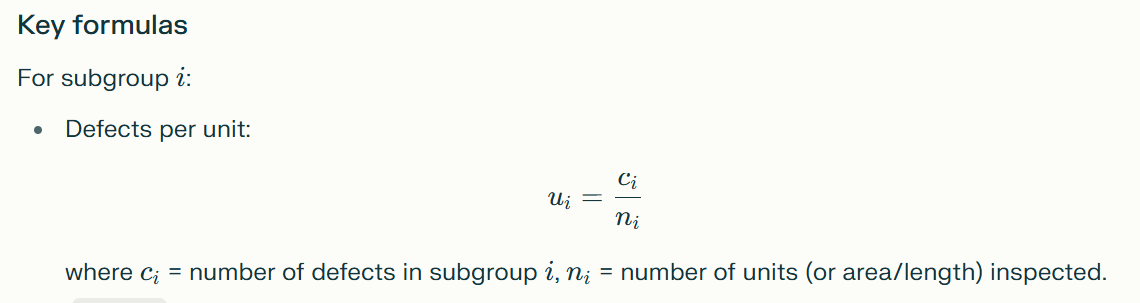
* 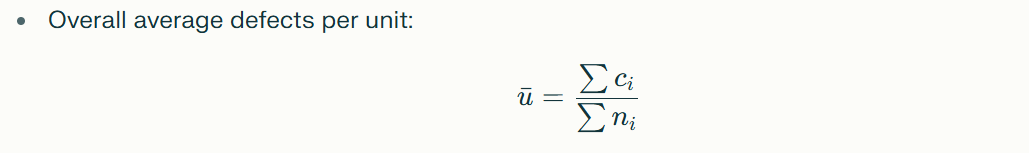
* 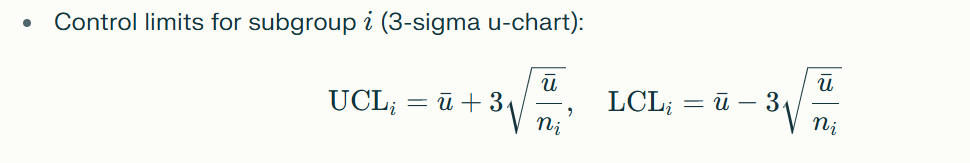
* 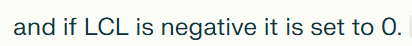

In [72]:
# --- Step 1: Generate Data ---
np.random.seed(42)

# 20 Software Modules
# "Units" represents size (e.g., 1 unit = 1000 lines of code)
# Sizes vary between 0.5 units and 3.0 units
units = np.round(np.random.uniform(0.5, 3.0, 20), 1)

* `np.random.uniform(low, high, size)`: generates random **floating-point numbers** from a uniform distribution over a given interval
* **low** is includeed, **high** is excluded
* every value in that range is **equally likely**
* __*Uniform Distribution*__ means **all values in the range are equally likely**

In [73]:
# Simulate Bugs (Poisson process)
# Assume average of 4 bugs per units of code
bugs = np.random.poisson(lam = 4 * units)
df = pd.DataFrame({'Size_Units':units, 'Bugs': bugs})

#### Poisson Process
* a mathematical model that describes events occuring randomly over time or space at a **constant average rate**
* `np.random.poisson()`: draws random integers fro a **Poisson distribution** with mean (rate) equal to lam (lambda)

In [74]:
# Calculate defects per unit (u)
df['u'] = df['Bugs']/df['Size_Units']
df.head()

,Size_Units,Bugs,u
0,1.4,5,3.571429
1,2.9,8,2.758621
2,2.3,8,3.478261
3,2.0,5,2.500000
4,0.9,4,4.444444


In [75]:
# Calculate the center line & control limits
u_bar = df['u'].sum() / df['Size_Units'].sum()

df['sigma'] = np.sqrt(u_bar / df['Size_Units'])

In [76]:
df

,Size_Units,Bugs,u,sigma
0,1.4,5,3.571429,1.300483
1,2.9,8,2.758621,0.903587
2,2.3,8,3.478261,1.014623
3,2.0,5,2.500000,1.088062
4,0.9,4,4.444444,1.621988
5,0.9,8,8.888889,1.621988
6,0.6,1,1.666667,1.986521
7,2.7,9,3.333333,0.936455
8,2.0,7,3.500000,1.088062
9,2.3,8,3.478261,1.014623


### The $C-Chart$ 
* used to monitor number of defects or nonconformalities in a sample of constant size
* based on the Poisson distribution
* used when: 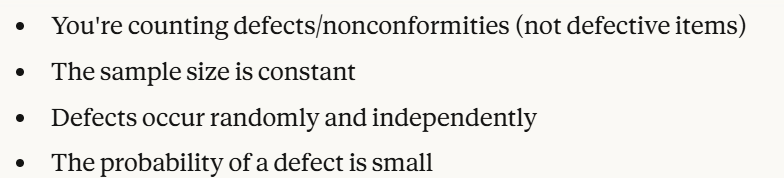

###### Formulas:
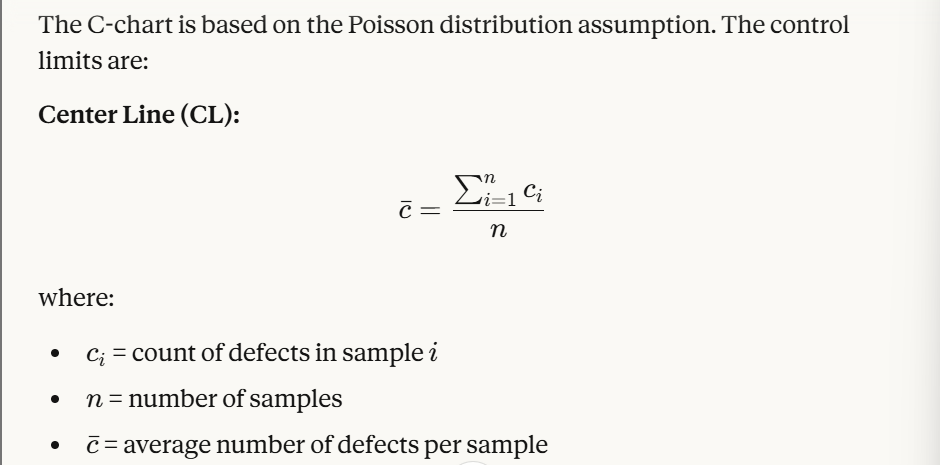   
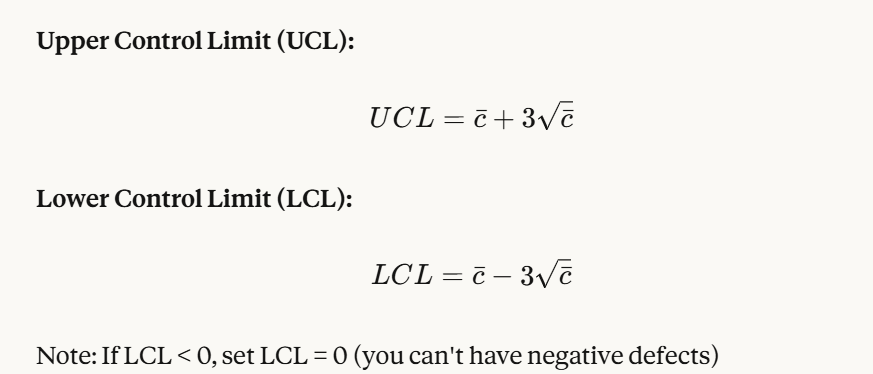    
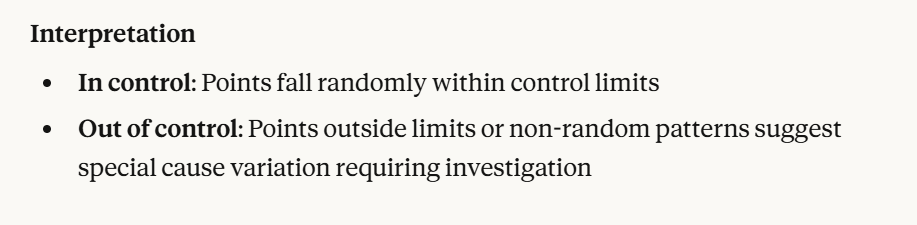

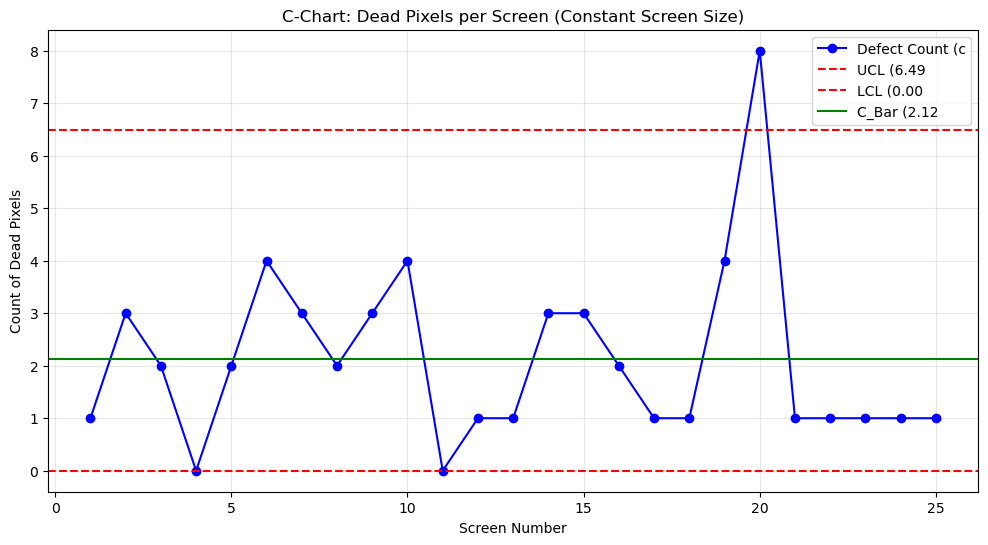

In [86]:
np.random.seed(10)

# We inspect 25 screens (COnstant Area of Opportunity)
# We assume the average  screen has about 2 dead pixels
# Poisson Distribution is used for counting defects in a fixed area
defects = np.random.poisson(lam = 2, size = 25)

# Introduce a "Systematic Failure" (Spike) at batch 20
defects[19] = 8

df = pd.DataFrame({'Screen_ID': range(1, 26), 'Dead_Pixels': defects})

# Calculate the statistics 

# Center Line
c_bar = df['Dead_Pixels'].mean()

# Calculate The Control Lines
sigma_c = np.sqrt(c_bar)

ucl_c = c_bar + 3*sigma_c
lcl_c = max(0 ,c_bar - 3*sigma_c) # LCL cannot be negative

# Visualization
plt.figure(figsize = (12, 6))

plt.plot(df['Screen_ID'], df['Dead_Pixels'], marker = 'o', color = 'b', label = 'Defect Count (c')

# Plot the center line
plt.axhline(ucl_c, color = 'r', linestyle = '--', label = f'UCL ({ucl_c:.2f}')
plt.axhline(lcl_c, color = 'r', linestyle = '--', label = f'LCL ({lcl_c:.2f}')

plt.axhline(c_bar, color = 'g', label = f'C_Bar ({c_bar:.2f}')


plt.title('C-Chart: Dead Pixels per Screen (Constant Screen Size)')
plt.ylabel('Count of Dead Pixels')
plt.xlabel('Screen Number')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [81]:
defects[19]

np.int32(3)